In [1]:
%matplotlib inline

# Exercise 09: Web Scraping Wikipedia

I would like you to examine whether or not there is a linear correlation between the size of a US state and the year it was admitted to the union.

Objectives: 
+ Scraping a table from a webpage
+ Storing that data in a dataframe
+ Performing a linear regression on that data

## Part A
Using the URL I've provided below, I want you to scrape:
1. The name of each state
2. The year of admittance for each state
3. The land area for each state

Examine the URL to the webpage I've provided using your browser's element inspector to determine how to parse the relavent table.  

Store the data collected in a Pandas' DataFrame.

## Part B
Once you have scraped the necessary data, I would like you to perform a linear regression on the year of admittance for each state (x-axis) against the land area of each state (y-axis) using the Linear Regression model from scikit learn.

You may use the [API reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [this example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) to assist you with your regression.

Plot the data points and regression line.  Print out the coefficients, mean squared error, and $r^2$ values of this model.


In [3]:
import urllib
import matplotlib.pylab as plt
from bs4 import BeautifulSoup
import bs4
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [4]:
wiki_url='https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
with urllib.request.urlopen(wiki_url) as response:
    territory = bs4.BeautifulSoup(response)
    

In [5]:
territory.title

<title>List of states and territories of the United States - Wikipedia</title>

In [6]:
all_tables = territory.find_all('table')

In [7]:
len(all_tables)

19

In [8]:
states_table = territory.findAll('table',
                           {'class':'wikitable sortable plainrowheaders'})
len(states_table)

4

In [9]:
states_table[0]


<table class="wikitable sortable plainrowheaders" style="text-align: center;">
<caption>States of the United States of America
</caption>
<tbody><tr>
<th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_8-0"><a href="#cite_note-USPSabbreviations-8">[8]</a></sup>
</th>
<th colspan="2" scope="col">Cities
</th>
<th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-10"><a href="#cite_note-10">[A]</a></sup>
</th>
<th rowspan="2" scope="col">Population<br/>(2020 census)<sup class="reference" id="cite_ref-:0_11-0"><a href="#cite_note-:0-11">[10]</a></sup>
</th>
<th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_12-0"><a href="#cite_note-areameasurements-12">[11]</a></sup>
</th>
<th colspan="2" scope="col">Land area<sup class=

In [10]:
import requests

In [11]:
states = states_table[0].findAll('a')
states

[<a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a>,
 <a href="#cite_note-USPSabbreviations-8">[8]</a>,
 <a href="#cite_note-10">[A]</a>,
 <a href="#cite_note-:0-11">[10]</a>,
 <a href="#cite_note-areameasurements-12">[11]</a>,
 <a href="#cite_note-areameasurements-12">[11]</a>,
 <a href="#cite_note-areameasurements-12">[11]</a>,
 <a href="/wiki/List_of_United_States_congressional_districts" title="List of United States congressional districts">Number<br/>of Reps.</a>,
 <a href="#cite_note-State_and_Local_Government_Finances_and_Employment-13">[12]</a>,
 <a href="/wiki/Alabama" title="Alabama">Alabama</a>,
 <a href="/wiki/Montgomery,_Alabama" title="Montgomery, Alabama">Montgomery</a>,
 <a href="/wiki/Huntsville,_Alabama" title="Huntsville, Alabama">Huntsville</a>,
 <a href="/wiki/Alaska" title="Alaska">Alaska</a>,
 <a href="/wiki/Juneau,_Alaska" title="Juneau, Alaska">Juneau</a>,
 <a href="/wiki/Anchora

In [12]:
table_rows = states_table[0].find_all('tr')
table_rows

[<tr>
 <th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_8-0"><a href="#cite_note-USPSabbreviations-8">[8]</a></sup>
 </th>
 <th colspan="2" scope="col">Cities
 </th>
 <th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-10"><a href="#cite_note-10">[A]</a></sup>
 </th>
 <th rowspan="2" scope="col">Population<br/>(2020 census)<sup class="reference" id="cite_ref-:0_11-0"><a href="#cite_note-:0-11">[10]</a></sup>
 </th>
 <th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_12-0"><a href="#cite_note-areameasurements-12">[11]</a></sup>
 </th>
 <th colspan="2" scope="col">Land area<sup class="reference" id="cite_ref-areameasurements_12-1"><a href="#cite_note-areameasurements-12">[11]</a></sup>
 </th>
 <th colspan="2" scope

In [13]:
master_list = []
for n in range(len(table_rows)):
    col = table_rows[n].find_all('td')
    sublist = []
    for i in col:
        sublist.append(i.text.strip())
        master_list.append(sublist)
final = set([tuple(x) for x in master_list])
final = list(final)

In [14]:
import numpy as np
nosubrow = []
for m in final:
    m = np.array(m)
    if len(m) == 12:
        nosubrow.append(m[[0,3,7]])
    else:
        nosubrow.append(m[[0,2,6]])
        
print(nosubrow)

[array(['CT', 'Jan 9, 1788', '4,842'], dtype='<U11'), array(['MD', 'Apr 28, 1788', '9,707'], dtype='<U12'), array(['LA', 'Apr 30, 1812', '43,204'], dtype='<U12'), array(['WV', 'Jun 20, 1863', '24,038'], dtype='<U12'), array(['OK', 'Nov 16, 1907', '68,595'], dtype='<U13'), array(['PA', 'Dec 12, 1787', '44,743'], dtype='<U12'), array(['WY', 'Jul 10, 1890', '97,093'], dtype='<U12'), array(['ME', 'Mar 15, 1820', '30,843'], dtype='<U12'), array(['AL', 'Dec 14, 1819', '50,645'], dtype='<U12'), array(['DE', 'Dec 7, 1787', '1,949'], dtype='<U11'), array(['MS', 'Dec 10, 1817', '46,923'], dtype='<U12'), array(['VA', 'Jun 25, 1788', '39,490'], dtype='<U14'), array(['NH', 'Jun 21, 1788', '8,953'], dtype='<U12'), array(['TN', 'Jun 1, 1796', '41,235'], dtype='<U11'), array(['HI', 'Aug 21, 1959', '6,423'], dtype='<U12'), array(['WI', 'May 29, 1848', '54,158'], dtype='<U12'), array(['NC', 'Nov 21, 1789', '48,618'], dtype='<U12'), array(['VT', 'Mar 4, 1791', '9,217'], dtype='<U11'), array(['UT', 'Jan 4

In [15]:
df1 = pd.DataFrame(data = nosubrow, columns = ['state name','admittance','land area'])

In [16]:
df1.sort_values('state name')
#df1

,state name,admittance,land area
23,AK,"Jan 3, 1959","570,641"
8,AL,"Dec 14, 1819","50,645"
49,AR,"Jun 15, 1836","52,035"
35,AZ,"Feb 14, 1912","113,594"
48,CA,"Sep 9, 1850","155,779"
29,CO,"Aug 1, 1876","103,642"
0,CT,"Jan 9, 1788","4,842"
9,DE,"Dec 7, 1787","1,949"
34,FL,"Mar 3, 1845","53,625"
42,GA,"Jan 2, 1788","57,513"


In [36]:
df1['land area'] = df1['land area'].str.replace(',', '').astype(float)
df1['admittance'] = df1['admittance'].str.replace(',', '').astype(str)
df1['admittance'] = pd.to_datetime(df1['admittance'], format='%b %d %Y')
df1['admittance_year']= df1['admittance'].dt.year
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   state name       50 non-null     object        
 1   admittance       50 non-null     datetime64[ns]
 2   land area        50 non-null     float64       
 3   admittance_year  50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [37]:
print (df1['admittance_year'])

0     1788
1     1817
2     1790
3     1890
4     1837
5     1850
6     1845
7     1788
8     1791
9     1845
10    1959
11    1789
12    1959
13    1788
14    1867
15    1792
16    1803
17    1889
18    1889
19    1863
20    1819
21    1788
22    1787
23    1787
24    1889
25    1846
26    1858
27    1859
28    1796
29    1818
30    1812
31    1896
32    1788
33    1821
34    1848
35    1788
36    1836
37    1816
38    1889
39    1864
40    1788
41    1787
42    1876
43    1788
44    1861
45    1820
46    1912
47    1890
48    1907
49    1912
Name: admittance_year, dtype: int64


Linear Coefficient (i.e. the value of m): 
 [986.61722517]
Mean squared error: 5032889913.14
Coefficient of determination: 0.30


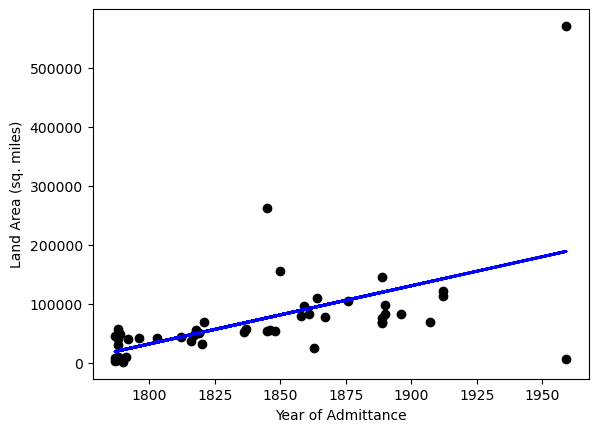

In [38]:
# create linear regression model
# create x and y
land = np.array(pd.to_numeric(df1['land area'] ,downcast = 'integer'))

y = land
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
fitresult = lm.fit(x,y)

# Make predictions
y_pred = fitresult.predict(x)

# The coefficients
print('Linear Coefficient (i.e. the value of m): \n', fitresult.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()

In [40]:
# Clearly it makes little sense to include the last two data
# points in the regression (AK and HI) ... let's remove them and do
# the regression over again.
df1

,state name,admittance,land area,admittance_year
0,MA,1788-02-06,7800.0,1788
1,MS,1817-12-10,46923.0,1817
2,RI,1790-05-29,1034.0,1790
3,WY,1890-07-10,97093.0,1890
4,MI,1837-01-26,56539.0,1837
5,CA,1850-09-09,155779.0,1850
6,FL,1845-03-03,53625.0,1845
7,GA,1788-01-02,57513.0,1788
8,VT,1791-03-04,9217.0,1791
9,TX,1845-12-29,261232.0,1845


In [41]:
df1 = df1.drop([10, 12])

Coefficients: 
 [684.92161604]
Mean squared error: 1334322806.18
Coefficient of determination: 0.38


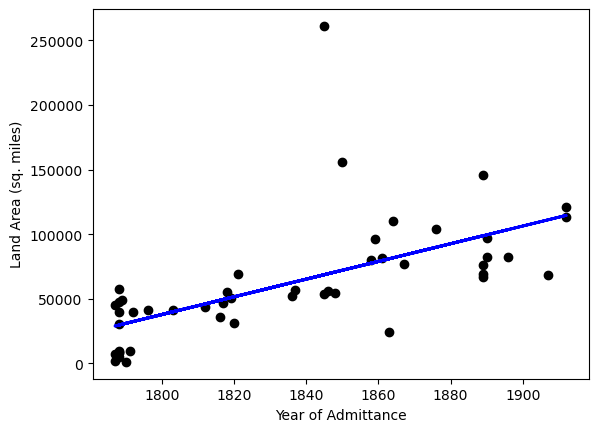

In [42]:
y = df1["land area"]
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

# Make predictions
pred = model.predict(x)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()